# Problem Set 3
Yewon Kim

# MLE estimation of simple macroeconomic model 

Data on ($c_t, k_t, w_t, r_t$) is given. We will use the following set of equations for estimation: 

$$(c_t)^{-1} -\beta E[r_{t+1}(c_{t+1})^{-1}] = 0$$

$$ c_t+ k_{t+1} - w_t - r_tk_t = 0 $$

$$ w_t-(1-\alpha)\exp(z_t)(k_t)^\alpha = 0 $$

$$ r_t - \alpha \exp(z_t)(k_t)^{\alpha-1} =0 $$

$$z_t = \rho z_{t-1} + (1-\rho)\mu + \epsilon_t $$ 
$$\mbox{where }\epsilon_t \sim N(0, \sigma^2)$$

In [14]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas
import scipy.optimize as opt

data = np.loadtxt('MacroSeries.txt', delimiter=',')
df = pandas.DataFrame(data)
## Renaming columns
df.columns = ['c', 'k', 'w', 'r']
df

,c,k,w,r
0,1.067109e+07,8.040697e+06,1.059438e+07,0.954120
1,1.169487e+07,7.595072e+06,1.161079e+07,1.107009
2,9.292394e+06,8.323735e+06,9.225588e+06,0.802596
3,7.913165e+06,6.613792e+06,7.856274e+06,0.860176
4,8.140994e+06,5.632136e+06,8.082466e+06,1.039183
5,8.274414e+06,5.794292e+06,8.214926e+06,1.026655
6,8.625916e+06,5.889252e+06,8.563901e+06,1.053011
7,9.012820e+06,6.139431e+06,8.948024e+06,1.055408
8,8.788320e+06,6.414808e+06,8.725138e+06,0.984940
9,9.720972e+06,6.255021e+06,9.651085e+06,1.117297


We have 5 parameters in total $(\alpha, \beta, \rho, \mu, \sigma)$, among which 4 parameters are estimated. 
$$\beta = 0.99$$
$$\alpha, \beta \in (0,1),~~~ \mu, \sigma >0, ~~~ \rho \in (-1,1)$$ 

# (a) Use the data $(w_t, k_t)$ and equations (3) and (5) to estimate the four parameters $(\alpha, \rho, \mu, \sigma)$ by maximum likelihood.

First, we back out a series of $z_t$ using equation(3):

$$ (1-\alpha)\exp(z_t)(k_t)^\alpha = w_t $$

$$ \exp(z_t) = \frac{w_t}{(1-\alpha)(k_t)^\alpha}$$ 

$$\Rightarrow z_t = \log(w_t) - \log((1-\alpha)(k_t)^\alpha) = \log(w_t) - \log(1-\alpha)-\alpha\log(k_t)$$

In [15]:
def log_lik_a(params, *args):
    w, k = args 
    aa, rr, mm, ss = params
    z = np.log(w)-np.log(1-aa)-aa*np.log(k)
    z_lag = np.array(z[:-1])
    z_lag = np.insert(z_lag,0,mm)
    pdf_z = sts.norm.pdf(z, loc = rr*z_lag + (1-rr)*mm, scale = ss)
    logl = np.log(pdf_z).sum()
    
    return -logl

temparg = (df['w'], df['k'])
param_init = np.array([0.6,0.4,100000,10000])
log_lik_a(param_init,df['w'],df['k'])

2844.6504196091601

In [16]:
params_init = np.array([0.8,0.9,5.5,0.1])

bnds = ((1e-10,1-1e-10), (-1+1e-10,1-1e-10),(1e-10,None),(1e-10,None))
results_a = opt.minimize(log_lik_a, params_init, args = (df['w'], df['k']), bounds = bnds, method ='L-BFGS-B')


alpha_a, rho_a, mu_a, sigma_a = results_a.x

results_a

      fun: -96.6537375054872
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.01252971, -0.00035669,  0.00102887, -0.01388116])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 265
      nit: 42
   status: 0
  success: True
        x: array([ 0.70204464,  0.47984901,  6.25466195,  0.09204457])

In [17]:
minimizer_kwargs = dict(method="L-BFGS-B", bounds=bnds,args = (df['w'],df['k']))
results_a = opt.basinhopping(log_lik_a, params_init, minimizer_kwargs = minimizer_kwargs)

alpha_a, rho_a, mu_a, sigma_a = results_a.x
results_a

                        fun: -96.706908071814723
 lowest_optimization_result:       fun: -96.706908071814723
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -8.24655899e-03,   6.96331881e-05,  -5.85487214e-04,
         2.13162821e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 220
      nit: 32
   status: 0
  success: True
        x: array([ 0.45751701,  0.7204891 ,  9.52270934,  0.09199623])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 51
                       nfev: 8420
                        nit: 100
                          x: array([ 0.45751701,  0.7204891 ,  9.52270934,  0.09199623])

In [18]:
w = df['w']
k = df['k']
z = np.log(w)-np.log(1-alpha_a)-alpha_a*np.log(k)
z_lag = np.array(z[:-1])
z_lag = np.insert(z_lag,0,mu_a)
eps = z - (rho_a*z_lag + (1-rho_a)*mu_a)
pts = np.linspace(min(eps), max(eps), num=1000)

To see if the model works okay, we plot the histogram of $\hat{\epsilon_t}$:

<IPython.core.display.Javascript object>


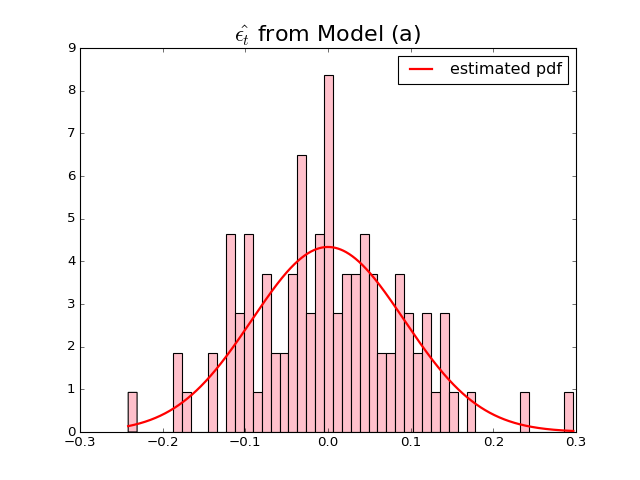

In [27]:
%matplotlib notebook 

plt.hist(eps, normed=True, bins = 50, color='pink') 
plt.title('$\hat{\epsilon_t}$ from Model (a)', fontsize=20)
plt.plot(pts,sts.norm.pdf(pts, loc = 0, scale = sigma_a),
         linewidth=2, color='r', label='estimated pdf')
plt.legend(loc='upper right')

To see how big z variables are, I also plot a histogram for $z_t$:

<IPython.core.display.Javascript object>


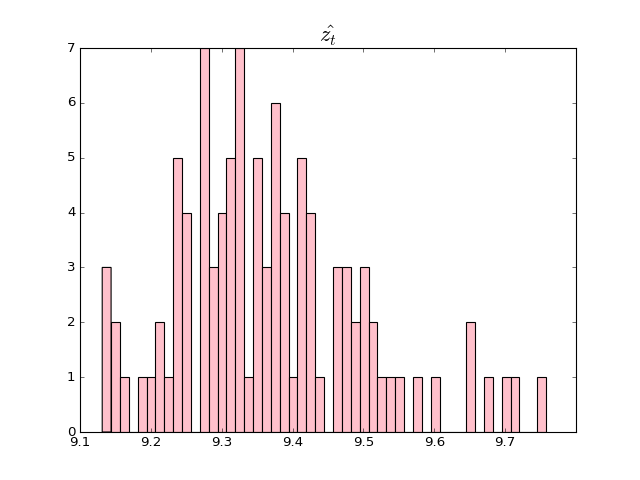

In [28]:
%matplotlib notebook 

plt.hist(z, bins = 50, color='pink')
plt.title('$\hat{z_t}$', fontsize=20)

Below is the result summary:

In [29]:
print('---- Model 1 including the initial z0 = mu ----')
print('alpha = ', alpha_a)
print('rho = ', rho_a)
print('mu =', mu_a)
print('sigma =', sigma_a)
print('Log Likelihood = ', -results_a.fun)
print('var-covar matrix')
print(results_a['lowest_optimization_result'].hess_inv.__dict__)

---- Model 1 including the initial z0 = mu ----
alpha =  0.457517009388
rho =  0.720489095381
mu = 9.52270934224
sigma = 0.0919962322592
Log Likelihood =  96.7069080718
var-covar matrix
{'sk': array([[  8.47770834e-05,  -1.70209134e-05,  -1.16332869e-03,
         -3.81205447e-06],
       [  4.64894378e-02,  -4.48327619e-02,  -6.66731223e-01,
         -6.14676960e-04],
       [  1.29605420e-02,  -1.25709546e-02,  -1.82640549e-01,
         -9.88543197e-04],
       [  5.50681920e-03,   3.46854134e-03,  -7.54758893e-02,
         -8.16386592e-04],
       [  1.80635365e-03,  -3.10138626e-03,  -2.63354999e-02,
          1.28782373e-04],
       [ -8.07634569e-04,  -4.45962220e-05,   1.16667243e-02,
          1.47839769e-05],
       [  5.05600937e-04,  -1.72540430e-04,  -6.97651844e-03,
         -5.43416852e-06],
       [  2.40200076e-03,  -1.47634393e-03,  -3.34170229e-02,
          9.76566249e-06],
       [  1.32230794e-03,  -1.05848110e-03,  -1.84980565e-02,
          1.57023387e-05],
      

# (b) Use the data $(r_t, k_t)$ and equations (4) and (5) to estimate the four parameters $(\alpha, \rho, \mu, \sigma)$ by maximum likelihood.

First, we back out a series of $z_t$ using equation(4):

$$ \alpha\exp(z_t)(k_t)^{\alpha-1} = r_t $$

$$ \exp(z_t) = \frac{r_t}{\alpha(k_t)^{\alpha-1}}$$ 

$$\Rightarrow z_t = \log(r_t) - \log(\alpha(k_t)^{\alpha-1}) = \log(r_t) - \log(\alpha)-(\alpha-1)\log(k_t)$$

In [30]:
def log_lik_b(params, *args):
    r, k = args 
    aa, rr, mm, ss = params
    z = np.log(r)-np.log(aa)-(aa-1)*np.log(k)
    z_lag = np.array(z[:-1])
    z_lag = np.insert(z_lag,0,mm)
    pdf_z = sts.norm.pdf(z, loc = rr*z_lag + (1-rr)*mm, scale = ss)
    logl = np.log(pdf_z).sum()
    
    return -logl

param_init = np.array([0.6,0.4,10,1])
log_lik_b(param_init,df['r'],df['k'])

274.70611154427434

In [31]:
params_init = np.array([0.3,0.1,9,0.1])

bnds = ((1e-10,1-1e-10), (-1+1e-10,1-1e-10),(1e-10,None),(1e-10,None))
minimizer_kwargs = dict(method="L-BFGS-B", bounds=bnds,args = (df['r'],df['k']))

results_b = opt.basinhopping(log_lik_b, params_init, minimizer_kwargs = minimizer_kwargs)


alpha_b, rho_b, mu_b, sigma_b = results_b.x

results_b

                        fun: -96.702424200399093
 lowest_optimization_result:       fun: -96.702424200399093
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00311644,  0.00026859, -0.02117275,  0.00055849])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 185
      nit: 24
   status: 0
  success: True
        x: array([ 0.47999683,  0.7036233 ,  8.96656686,  0.09200038])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 57
                       nfev: 8530
                        nit: 100
                          x: array([ 0.47999683,  0.7036233 ,  8.96656686,  0.09200038])

Again, we draw the histogram of $\epsilon_t$ and $z_t$: 

<IPython.core.display.Javascript object>


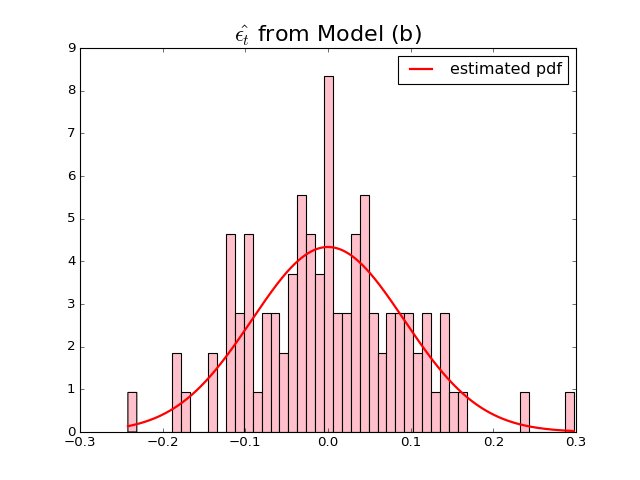

In [34]:
r = df['r']
k = df['k']
z = np.log(r)-np.log(alpha_b)-(alpha_b-1)*np.log(k)
z_lag = np.array(z[:-1])
z_lag = np.insert(z_lag,0,mu_b)
eps = z - (rho_b*z_lag + (1-rho_b)*mu_b)


%matplotlib notebook 
pts = np.linspace(min(eps), max(eps), num=1000)
plt.hist(eps, normed=True, bins = 50, color='pink') 
plt.title('$\hat{\epsilon_t}$ from Model (b)', fontsize=20)
plt.plot(pts,sts.norm.pdf(pts, loc = 0, scale = sigma_b),
         linewidth=2, color='r', label='estimated pdf')
plt.legend(loc='upper right')

<IPython.core.display.Javascript object>


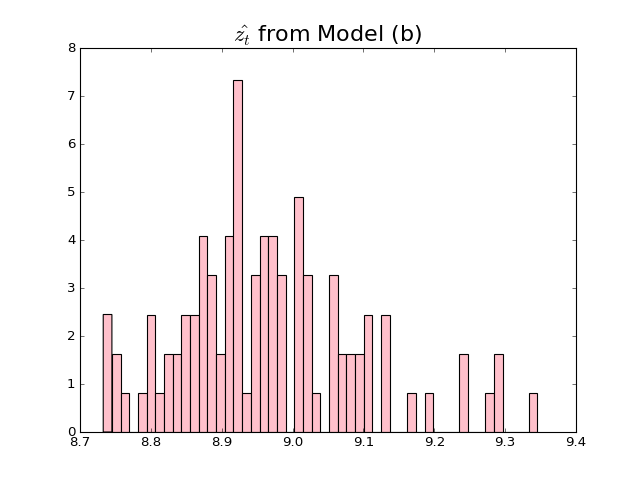

In [33]:
%matplotlib notebook 
plt.hist(z, normed=True, bins = 50, color='pink') 
plt.title('$\hat{z_t}$ from Model (b)', fontsize=20)

Based on the empirical distriubtion of pdf, one might try to model $\epsilon$ as truncated normal (truncated from both sides). 

Below is the result summary:

In [35]:
print('---- Model b including the initial z0 ----')
print('alpha = ', alpha_b)
print('rho = ', rho_b)
print('mu =', mu_b)
print('sigma =', sigma_b)
print('var-covar matrix')
print(results_b['lowest_optimization_result'].hess_inv.__dict__)

---- Model b including the initial z0 ----
alpha =  0.479996834087
rho =  0.703623301543
mu = 8.96656686368
sigma = 0.0920003798809
var-covar matrix
{'sk': array([[ -3.49904874e-04,  -9.39359420e-04,  -1.44172582e-05,
         -2.74682319e-04],
       [  2.25931627e-05,  -1.90169348e-03,  -2.14538537e-05,
         -2.15813123e-04],
       [ -1.54745938e-06,   3.62153517e-04,   6.40297175e-06,
          6.23528324e-05],
       [  1.85766161e-02,  -3.86551549e-03,  -2.60339429e-04,
          5.96515277e-03],
       [ -2.31456163e-03,  -3.48484008e-04,   5.56736481e-04,
          5.30968278e-03],
       [  1.94306997e-03,  -3.56672950e-02,  -3.56011270e-04,
         -2.86136492e-03],
       [  2.29828557e-03,  -1.15192804e-01,  -6.75019655e-04,
         -5.92149051e-03],
       [ -3.23634412e-03,  -6.76128701e-02,  -7.09861599e-05,
         -1.95785980e-03],
       [  2.46114247e-05,  -6.36977701e-02,   1.45377276e-04,
          2.10539042e-03],
       [  5.44510610e-04,   5.23667364e-03,

# (c) What is $Pr(r_t>1|\hat{\theta}, k_t, z_{t-1})$ where $k_t = 7500000$ and $z_{t-1}=10$?

To solve for this probability, we first use equation (4) and compute $z^*$ such that $r_t=1$. Then, use (5) to solve for the probability that $z_t>z^*$.

In [36]:
## Calculate z*
z_star = np.log(1)- np.log(alpha_a)- (alpha_a-1)*np.log(7500000)
prob = 1-sts.norm.cdf(z_star, loc = rho_a*10+(1-rho_a)*mu_a, scale = sigma_a)
print('Pr(r_t>1| theta, k_t=7500000, z_(t-1)=10)=', prob)

Pr(r_t>1| theta, k_t=7500000, z_(t-1)=10)= 0.999999966963


In [37]:
print('Mean k: ', np.mean(k))
print('Mean z: ', np.mean(z))
print('Mean r: ', np.mean(r))
print('z_star: ', z_star)


Mean k:  7472544.557306591
Mean z:  8.964189014921658
Mean r:  1.0169473019487585
z_star:  9.36967131666


It seems that $\hat{z}$ constructed by Model (a) has a tight distribution around mean 9.37 with standard deviation less than 0.1, which implies that given $z_{t-1}=10$ it is highly likely that $r_t$ is greater than its mean (1.01). 